<a href="https://colab.research.google.com/github/aryanchavan30/Data-Analysis/blob/main/FIFA_Dataset_Analysis_(Web_Scraping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Steps

# 1. Scrape the Data
# 2. Data Cleaning
# 3. Convert your data into DataFrame
# 4. Perform the Data Analysis - Data Cleaning, Data Exploration, Data Manipulation, Data Viosualization
# 5. Perform the EDA (Exploratory Data Analysis)

# Performing the Data Scraping from the WEB
Link: https://sofifa.com/players

In [ ]:
# Getting 10 pages of Website for scraping

for i in range(0,600,60):
  print(f'https://sofifa.com/players?offset={i}')


https://sofifa.com/players?offset=0
https://sofifa.com/players?offset=60
https://sofifa.com/players?offset=120
https://sofifa.com/players?offset=180
https://sofifa.com/players?offset=240
https://sofifa.com/players?offset=300
https://sofifa.com/players?offset=360
https://sofifa.com/players?offset=420
https://sofifa.com/players?offset=480
https://sofifa.com/players?offset=540


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import requests

In [ ]:
columns = ['IMAGE_LINK', 'NAME', 'AGE', 'OVA', 'POT', 'TEAM',
           'DURATION', 'VALUE', 'WAGE', 'TOTAL_STATS']

In [ ]:
url='https://sofifa.com/players?offset=0'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}


In [ ]:
req = requests.get(url , headers = headers )

In [ ]:
req.status_code

200

In [ ]:
soup = BeautifulSoup(req.content)

In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head id="head">\n  <title>\n   Players FIFA 23 Feb 7, 2023 SoFIFA\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>\n  <meta content="FIFA 23 player ratings on Feb 7, 2023" name="description"/>\n  <meta content="2009 - 2023 SoFIFA.com" name="copyright"/>\n  <meta content="light" name="twitter:widgets:theme"/>\n  <meta content="#e6e6e6" name="twitter:widgets:border-color"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="shortcut icon"/>\n  <link href="https://static.sofifa.net/launcher-icon.png" rel="apple-touch-icon"/>\n  <script>\n   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];\n  </script>\n  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>\n  <link href="https://sofifa.com/players?hl=fr-FR" hreflang="fr" rel="

In [ ]:
for i in soup.findAll('td'):
  print(i)

<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/000/041/22_60.png" data-srcset="https://cdn.sofifa.net/players/000/041/22_120.png 2x, https://cdn.sofifa.net/players/000/041/22_180.png 3x" data-type="player" id="41" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a aria-label="Andrés Iniesta Luján" data-tip-pos="top" href="/player/41/andres-iniesta-lujan/220069/" role="tooltip"><div class="ellipsis"><span class="bp3-tag bp3-minimal bp3-intent-success">22</span> Iniesta</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/es.png" data-srcset="https://cdn.sofifa.net/flags/es@2x.png 2x, https://cdn.sofifa.net/flags/es@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="Spain" width="21"/> <a href="/players?pn=18" rel="nof

In [ ]:
arr = []

In [ ]:
arr = [i for i in soup.findAll('tr')]

In [ ]:
del arr[0]


In [ ]:
arr[0]

<tr>
<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/000/041/22_60.png" data-srcset="https://cdn.sofifa.net/players/000/041/22_120.png 2x, https://cdn.sofifa.net/players/000/041/22_180.png 3x" data-type="player" id="41" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a aria-label="Andrés Iniesta Luján" data-tip-pos="top" href="/player/41/andres-iniesta-lujan/220069/" role="tooltip"><div class="ellipsis"><span class="bp3-tag bp3-minimal bp3-intent-success">22</span> Iniesta</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/es.png" data-srcset="https://cdn.sofifa.net/flags/es@2x.png 2x, https://cdn.sofifa.net/flags/es@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="Spain" width="21"/> <a href="/players?pn=18" rel

In [ ]:
# Image Link
re.sub('^<img.*data-srcset="|\s.*/>' ,'' , str(arr[0].find('img',{"class" : "player-check"})))

'https://cdn.sofifa.net/players/238/067/23_120.png'

In [ ]:
# Name
re.sub('^<a.*ellipsis">|<.*>' , '' , str(arr[0].find('a' , {"role" : "tooltip"})))

'N. Zaniolo'

In [ ]:
arr[37]

<tr>
<td class="col-avatar"><figure class="avatar">
<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/256/887/23_60.png" data-srcset="https://cdn.sofifa.net/players/256/887/23_120.png 2x, https://cdn.sofifa.net/players/256/887/23_180.png 3x" data-type="player" id="256887" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>
<td class="col-name">
<a aria-label="Taylor Booth" data-tip-pos="top" href="/player/256887/taylor-booth/230012/" role="tooltip"><div class="ellipsis">T. Booth</div></a><img alt="" class="flag" data-src="https://cdn.sofifa.net/flags/us.png" data-srcset="https://cdn.sofifa.net/flags/us@2x.png 2x, https://cdn.sofifa.net/flags/us@3x.png 3x" height="16" src="https://cdn.sofifa.net/pixel.gif" title="United States" width="21"/> <a href="/players?pn=14" rel="nofollow"><span class="pos pos14">CM</span></a> <a href="/players?pn=18" rel="nofollow"><span class="pos pos18">CAM</span></a></td><t

In [ ]:
arr[0].find('div' , {"class" : "sub"})

<div class="sub">
2018 ~ 2024</div>

In [ ]:
# Age
re.sub('^<td.*">|<.*>' , '' , str(arr[0].find('td' , {"class" : "col col-ae"})))

'22'

In [ ]:
# POT
re.sub('^<.*">|<.*>' , '' , str(arr[0].find('td' , {"class" : "col col-pt"})))

'85'

In [ ]:
# Team
re.sub('^<a.*">|<.*>' , '' , str(arr[0].findAll('a')[-1]))

'Roma'

In [ ]:
# Duration
re.sub('^<.*\n|<.*>' , '' , str(arr[0].find('div' , {"class" : "sub"})))

'2018 ~ 2024'

In [ ]:
arr[0].find('td', {"class" : "col col-vl"})


<td class="col col-vl" data-col="vl">€33M</td>

In [ ]:
# Value
re.sub('^<td.*">€|<.*>' , '' ,str(arr[0].find('td', {"class" : "col col-vl"})))

'33M'

In [ ]:
# Wage
re.sub('^<td.*">€|<.*>' , '' ,str(arr[0].find('td', {"class" : "col col-wg"})))

'66K'

In [ ]:
# Total Stats
re.sub('^<td.*">|<.*>' , '' ,str(arr[0].find('td', {"class" : "col col-tt"})))

'2089'

In [ ]:
fifa_final = pd.DataFrame()

for i in range(0,1081,60):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url , headers = headers )
  if req.status_code == 200:
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(10)]

    for i in soup.findAll('tr'):
      Image_Link = re.sub('^<img.*data-srcset="| .*/>', '' , str(i.find('img',{"class": "player-check"})))
      Name = re.sub('^<a.*">|<.*>', '', str(i.find('a', {"role":"tooltip"})))
      Age = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col"})))
      OVA = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-oa"})))
      POT = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class":"col col-pt"})))
      Team = re.sub('<a.*">|<.*>', '', str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|<.*>', '', str(i.find('div', {"class": "sub"})))
      Value = re.sub('^<td.*">€|M<.*>|K<.*>|</td>', '', str(i.find('td', {"class": "col col-vl"})))
      Wage = re.sub('^<td.*">€|K<.*>|M<.*>|</td>', '', str(i.find('td', {"class": "col col-wg"})))
      Total_stats = re.sub('^<td.*">|<.*>', '', str(i.find('td', {"class": "col col-tt"})))


      lists[0].append(Image_Link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)


  fifa = pd.DataFrame({"Image_link":lists[0],
                      "Name": lists[1],
                      "Age": lists[2],
                      "OVA": lists[3],
                      "POT": lists[4],
                      "Team": lists[5],
                      "Duration": lists[6],
                      "Value": lists[7],
                      "Wage": lists[8],
                      "Total_stats": lists[9]})

  fifa.drop(0, inplace=True)

  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])

  fifa_final = fifa_final.append(fifa, ignore_index=True)

In [ ]:
fifa_final

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.net/players/264/701/22_120.png,22,18,72,86,,Free,0.0,0,1904
1,https://cdn.sofifa.net/players/221/639/23_120.png,Mariano,28,74,74,Real Madrid,2018 ~ 2023,4.3,110,1948
2,https://cdn.sofifa.net/players/255/565/23_120.png,K. Mitoma,25,75,78,Brighton &amp; Hove Albion,2021 ~ 2025,7.5,51,1943
3,https://cdn.sofifa.net/players/247/635/23_120.png,K. Kvaratskhelia,21,79,88,Napoli,2022 ~ 2027,39.5,46,1949
4,https://cdn.sofifa.net/players/232/293/23_120.png,V. Osimhen,23,83,89,Napoli,2020 ~ 2025,58.0,72,1999
...,...,...,...,...,...,...,...,...,...,...
1135,https://cdn.sofifa.net/players/272/788/23_120.png,Félix,18,64,80,Real Betis,2022 ~ 2026,1.4,1,1390
1136,https://cdn.sofifa.net/players/272/834/23_120.png,João Neves,17,65,84,Benfica,2022 ~ 2028,1.8,500,1731
1137,https://cdn.sofifa.net/players/272/936/23_120.png,Luizão,20,69,80,West Ham United,2023 ~ 2026,2.9,18,1607
1138,https://cdn.sofifa.net/players/272/981/23_120.png,S. Vos,17,60,83,Ajax,2021 ~ 2024,750.0,500,1539


In [ ]:
len(fifa_final)

1140

In [ ]:
len(fifa_final.columns)

10

In [ ]:
fifa_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   1140 non-null   object 
 1   Name         1140 non-null   object 
 2   Age          1140 non-null   int64  
 3   OVA          1140 non-null   int64  
 4   POT          1140 non-null   int64  
 5   Team         1140 non-null   object 
 6   Duration     1140 non-null   object 
 7   Value        1140 non-null   float64
 8   Wage         1140 non-null   int64  
 9   Total_stats  1140 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 89.2+ KB


In [ ]:
fifa_final.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,23.746491,75.674561,82.103509,41.490088,72.361404,1851.476316
std,4.548609,6.598498,4.197473,126.902687,125.397913,240.402933
min,16.000000,51.000000,62.000000,0.000000,0.000000,893.000000
25%,20.000000,72.000000,80.000000,4.200000,13.000000,1727.000000
50%,23.000000,76.000000,82.000000,12.500000,34.000000,1886.000000
75%,26.000000,80.000000,85.000000,29.000000,72.250000,2019.000000
max,44.000000,91.000000,95.000000,975.000000,950.000000,2312.000000


In [ ]:
# How many null values are there in each column?
fifa_final.isna().sum()

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [ ]:
# How many null values are there in dataset?
fifa_final.isna().sum().sum()

0

In [ ]:
# Check for the Duplicate values?
fifa_final.duplicated().sum()


13

In [ ]:
# Show all Duplicate value
duplicate = fifa_final[fifa_final.duplicated()]
duplicate

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
61,https://cdn.sofifa.net/players/246/430/23_120.png,D. Vlahović,22,84,91,Juventus,2022 ~ 2026,86.5,140,1961
122,https://cdn.sofifa.net/players/200/145/23_120.png,Casemiro,30,89,89,Manchester United,2022 ~ 2026,86.0,240,2239
222,https://cdn.sofifa.net/players/266/891/23_120.png,M. Lazetić,18,65,85,Milan,2022 ~ 2026,2.0,6,1659
274,https://cdn.sofifa.net/players/247/246/23_120.png,K. Thuram,21,78,85,Nice,2019 ~ 2025,28.5,32,2090
336,https://cdn.sofifa.net/players/245/741/23_120.png,J. Lindstrøm,22,77,84,Eintracht Frankfurt,2021 ~ 2026,21.5,25,1903
337,https://cdn.sofifa.net/players/246/764/23_120.png,M. Camara,22,77,85,Monaco,2022 ~ 2027,22.5,37,2011
438,https://cdn.sofifa.net/players/212/190/23_120.png,N. Süle,26,85,87,Borussia Dortmund,2022 ~ 2026,59.0,72,1843
539,https://cdn.sofifa.net/players/241/042/23_120.png,O. Skipp,21,77,83,Tottenham Hotspur,2018 ~ 2024,15.5,49,1845
659,https://cdn.sofifa.net/players/251/401/23_120.png,T. Coulibaly,21,69,80,VfB Stuttgart,2019 ~ 2023,3.1,9,1716
743,https://cdn.sofifa.net/players/203/841/23_120.png,N. Pope,30,83,83,Newcastle United,2022 ~ 2026,24.0,88,1305


In [ ]:
# Delete all the duplicated values
fifa_final.drop_duplicates(inplace=True)

In [ ]:
len(fifa_final)

1127

In [ ]:
fifa_final.tail()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1135,https://cdn.sofifa.net/players/272/788/23_120.png,Félix,18,64,80,Real Betis,2022 ~ 2026,1.4,1,1390
1136,https://cdn.sofifa.net/players/272/834/23_120.png,João Neves,17,65,84,Benfica,2022 ~ 2028,1.8,500,1731
1137,https://cdn.sofifa.net/players/272/936/23_120.png,Luizão,20,69,80,West Ham United,2023 ~ 2026,2.9,18,1607
1138,https://cdn.sofifa.net/players/272/981/23_120.png,S. Vos,17,60,83,Ajax,2021 ~ 2024,750.0,500,1539
1139,https://cdn.sofifa.net/players/273/559/23_120.png,R. Chagas,18,62,72,Nacional,2022 ~ 2023,825.0,500,1755


In [ ]:
fifa_final.reset_index(inplace=True)

In [ ]:
fifa_final.tail()

,index,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1121,1135,https://cdn.sofifa.net/players/272/788/23_120.png,Félix,18,64,80,Real Betis,2022 ~ 2026,1.4,1,1390
1122,1136,https://cdn.sofifa.net/players/272/834/23_120.png,João Neves,17,65,84,Benfica,2022 ~ 2028,1.8,500,1731
1123,1137,https://cdn.sofifa.net/players/272/936/23_120.png,Luizão,20,69,80,West Ham United,2023 ~ 2026,2.9,18,1607
1124,1138,https://cdn.sofifa.net/players/272/981/23_120.png,S. Vos,17,60,83,Ajax,2021 ~ 2024,750.0,500,1539
1125,1139,https://cdn.sofifa.net/players/273/559/23_120.png,R. Chagas,18,62,72,Nacional,2022 ~ 2023,825.0,500,1755


In [ ]:
# Delete the columns - index, Image_link, Duration
fifa_final.drop(['index','Image_link','Duration'], axis=1, inplace=True)

In [ ]:
fifa_final.sort_values("Wage" ,ascending=False)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
1116,Nacho Ferri,17,61,80,Eintracht Frankfurt,825.0,950,1463
904,A. Laïdouni,25,75,80,Ferencváros,7.5,950,1889
640,M. Solomon,22,76,83,Fulham,15.0,900,1862
408,L. Krejčí,23,76,84,Sparta Praha,15.5,900,1972
411,J. Šutalo,22,77,84,Dinamo Zagreb,20.0,900,1731
...,...,...,...,...,...,...,...,...
594,A. Afif,25,76,77,,0.0,0,1837
183,T. Vaclík,33,80,80,,0.0,0,1308
727,R. Funes Mori,31,75,75,,0.0,0,1984
96,A. Vega,24,79,82,,0.0,0,1966


# Q1 Find all the (name) Player who is having the highest wage.

In [ ]:
fifa_final[fifa_final['Wage']==max(fifa_final['Wage'])][['Name','Wage']]

,Name,Wage
458,L. Krejčí,900
463,J. Šutalo,900
569,M. Solomon,900


# Q2 List out the Top 10 Players according to their POT

In [ ]:
fifa_final.sort_values("POT" ,ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
103,K. Mbappé,23,91,95,Paris Saint Germain,190.5,230,2181
125,E. Haaland,21,89,94,Manchester City,160.0,230,2128
182,P. Foden,22,85,92,Manchester City,109.5,180,2087
229,G. Donnarumma,23,88,92,Paris Saint Germain,103.5,110,1375
90,Vinícius Jr.,21,86,92,Real Madrid,109.0,200,1985
107,Pedri,19,85,92,FC Barcelona,104.5,115,2112
72,J. Musiala,19,83,92,FC Bayern München,78.5,46,2027
157,F. de Jong,25,87,92,FC Barcelona,116.5,230,2238
534,K. Benzema,34,91,91,Real Madrid,64.0,450,2147
398,Rúben Dias,25,88,91,Manchester City,107.5,230,1895


# Q3 Find youngest player

In [ ]:
fifa_final[fifa_final['Age']==min(fifa_final['Age'])][['Name','Age']]

,Name,Age
96,R. Bardghji,16
287,R. Wilson,16
528,P. Wanner,16
529,B. Doak,16
592,J. Bellingham,16
708,A. Ibrahimovic,16
823,S. Ngoma,16


# Q4 Find oldest player

In [ ]:
fifa_final[fifa_final['Age']==max(fifa_final['Age'])][['Name','Age']]

,Name,Age
593,G. Buffon,44


# Q5 Plot a graph - First 10 player's Name Vs Player's POT

In [ ]:
new_fifa = fifa_final.sort_values("POT" ,ascending=False).head(10)

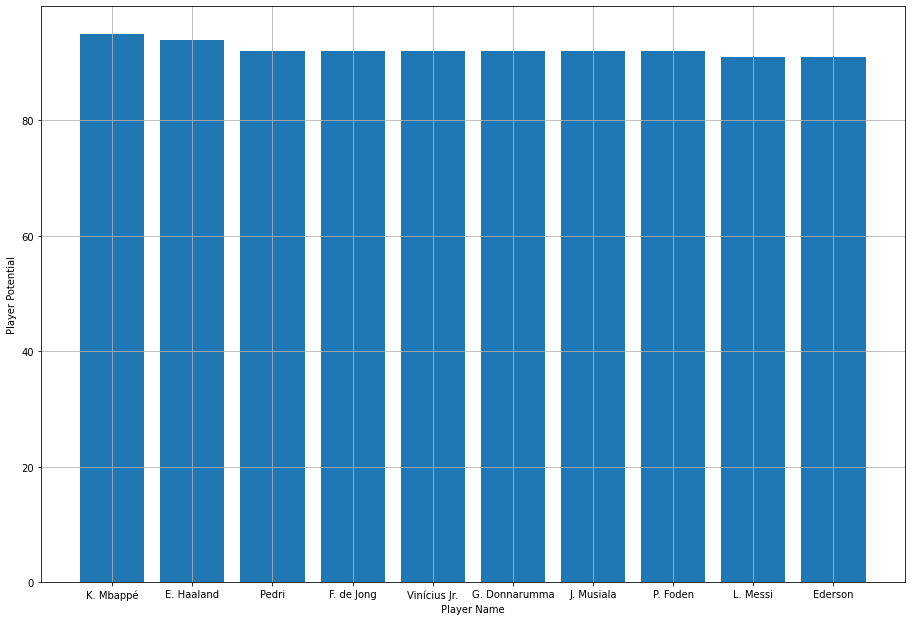

In [ ]:
fig = plt.figure()
ax = fig.add_axes((1,1,2,2))
plt.xlabel("Player Name")
plt.ylabel("Player Potential")
plt.bar(new_fifa['Name'] , new_fifa['POT'])
plt.grid()

# Q8 Plot a graph - First 10 player's Name Vs Player's Wage

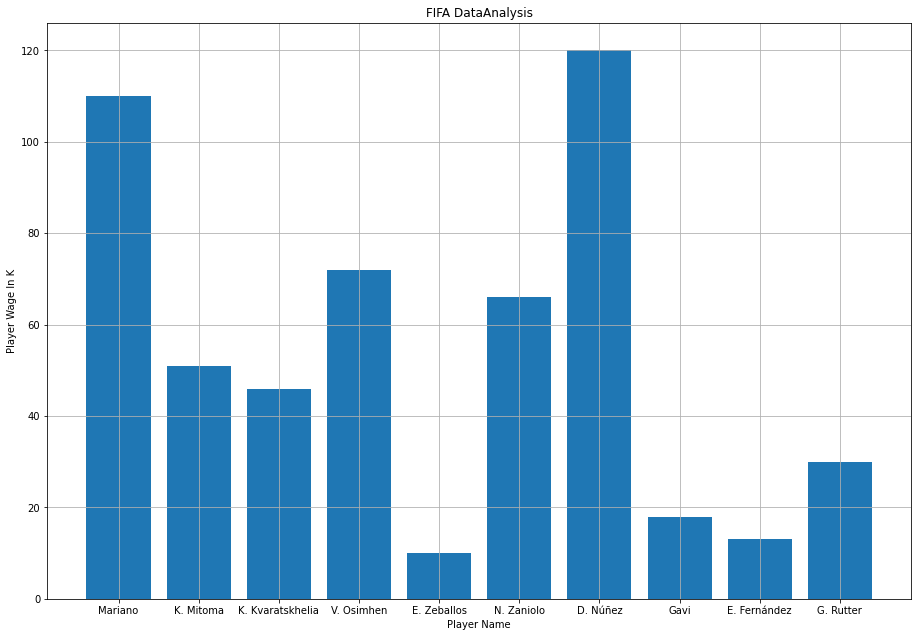

In [ ]:
fig = plt.figure()
ax = fig.add_axes((1,1,2,2))
plt.xlabel("Player Name")
plt.ylabel("Player Wage In K")
plt.title("FIFA DataAnalysis")
plt.bar(fifa_final['Name'].head(10) , fifa_final['Wage'].head(10))
plt.grid()

# Q9 Find the Player(s) whose potential is more than 90

In [ ]:
fifa_final[fifa_final["POT"] >= 90].sort_values(by = "POT" ,ascending=False)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
80,K. Mbappé,23,91,95,Paris Saint Germain,190.5,230,2181
13,E. Haaland,21,89,94,Manchester City,160.0,230,2128
36,P. Foden,22,85,92,Manchester City,109.5,180,2087
513,G. Donnarumma,23,88,92,Paris Saint Germain,103.5,110,1375
190,F. de Jong,25,87,92,FC Barcelona,116.5,230,2238
87,Pedri,19,85,92,FC Barcelona,104.5,115,2112
16,J. Musiala,19,83,92,FC Bayern München,78.5,46,2027
132,Vinícius Jr.,21,86,92,Real Madrid,109.0,200,1985
156,Rúben Dias,25,88,91,Manchester City,107.5,230,1895
473,K. Benzema,34,91,91,Real Madrid,64.0,450,2147


# Q10 Plot the graph for Player(s) whose potential is more than 90

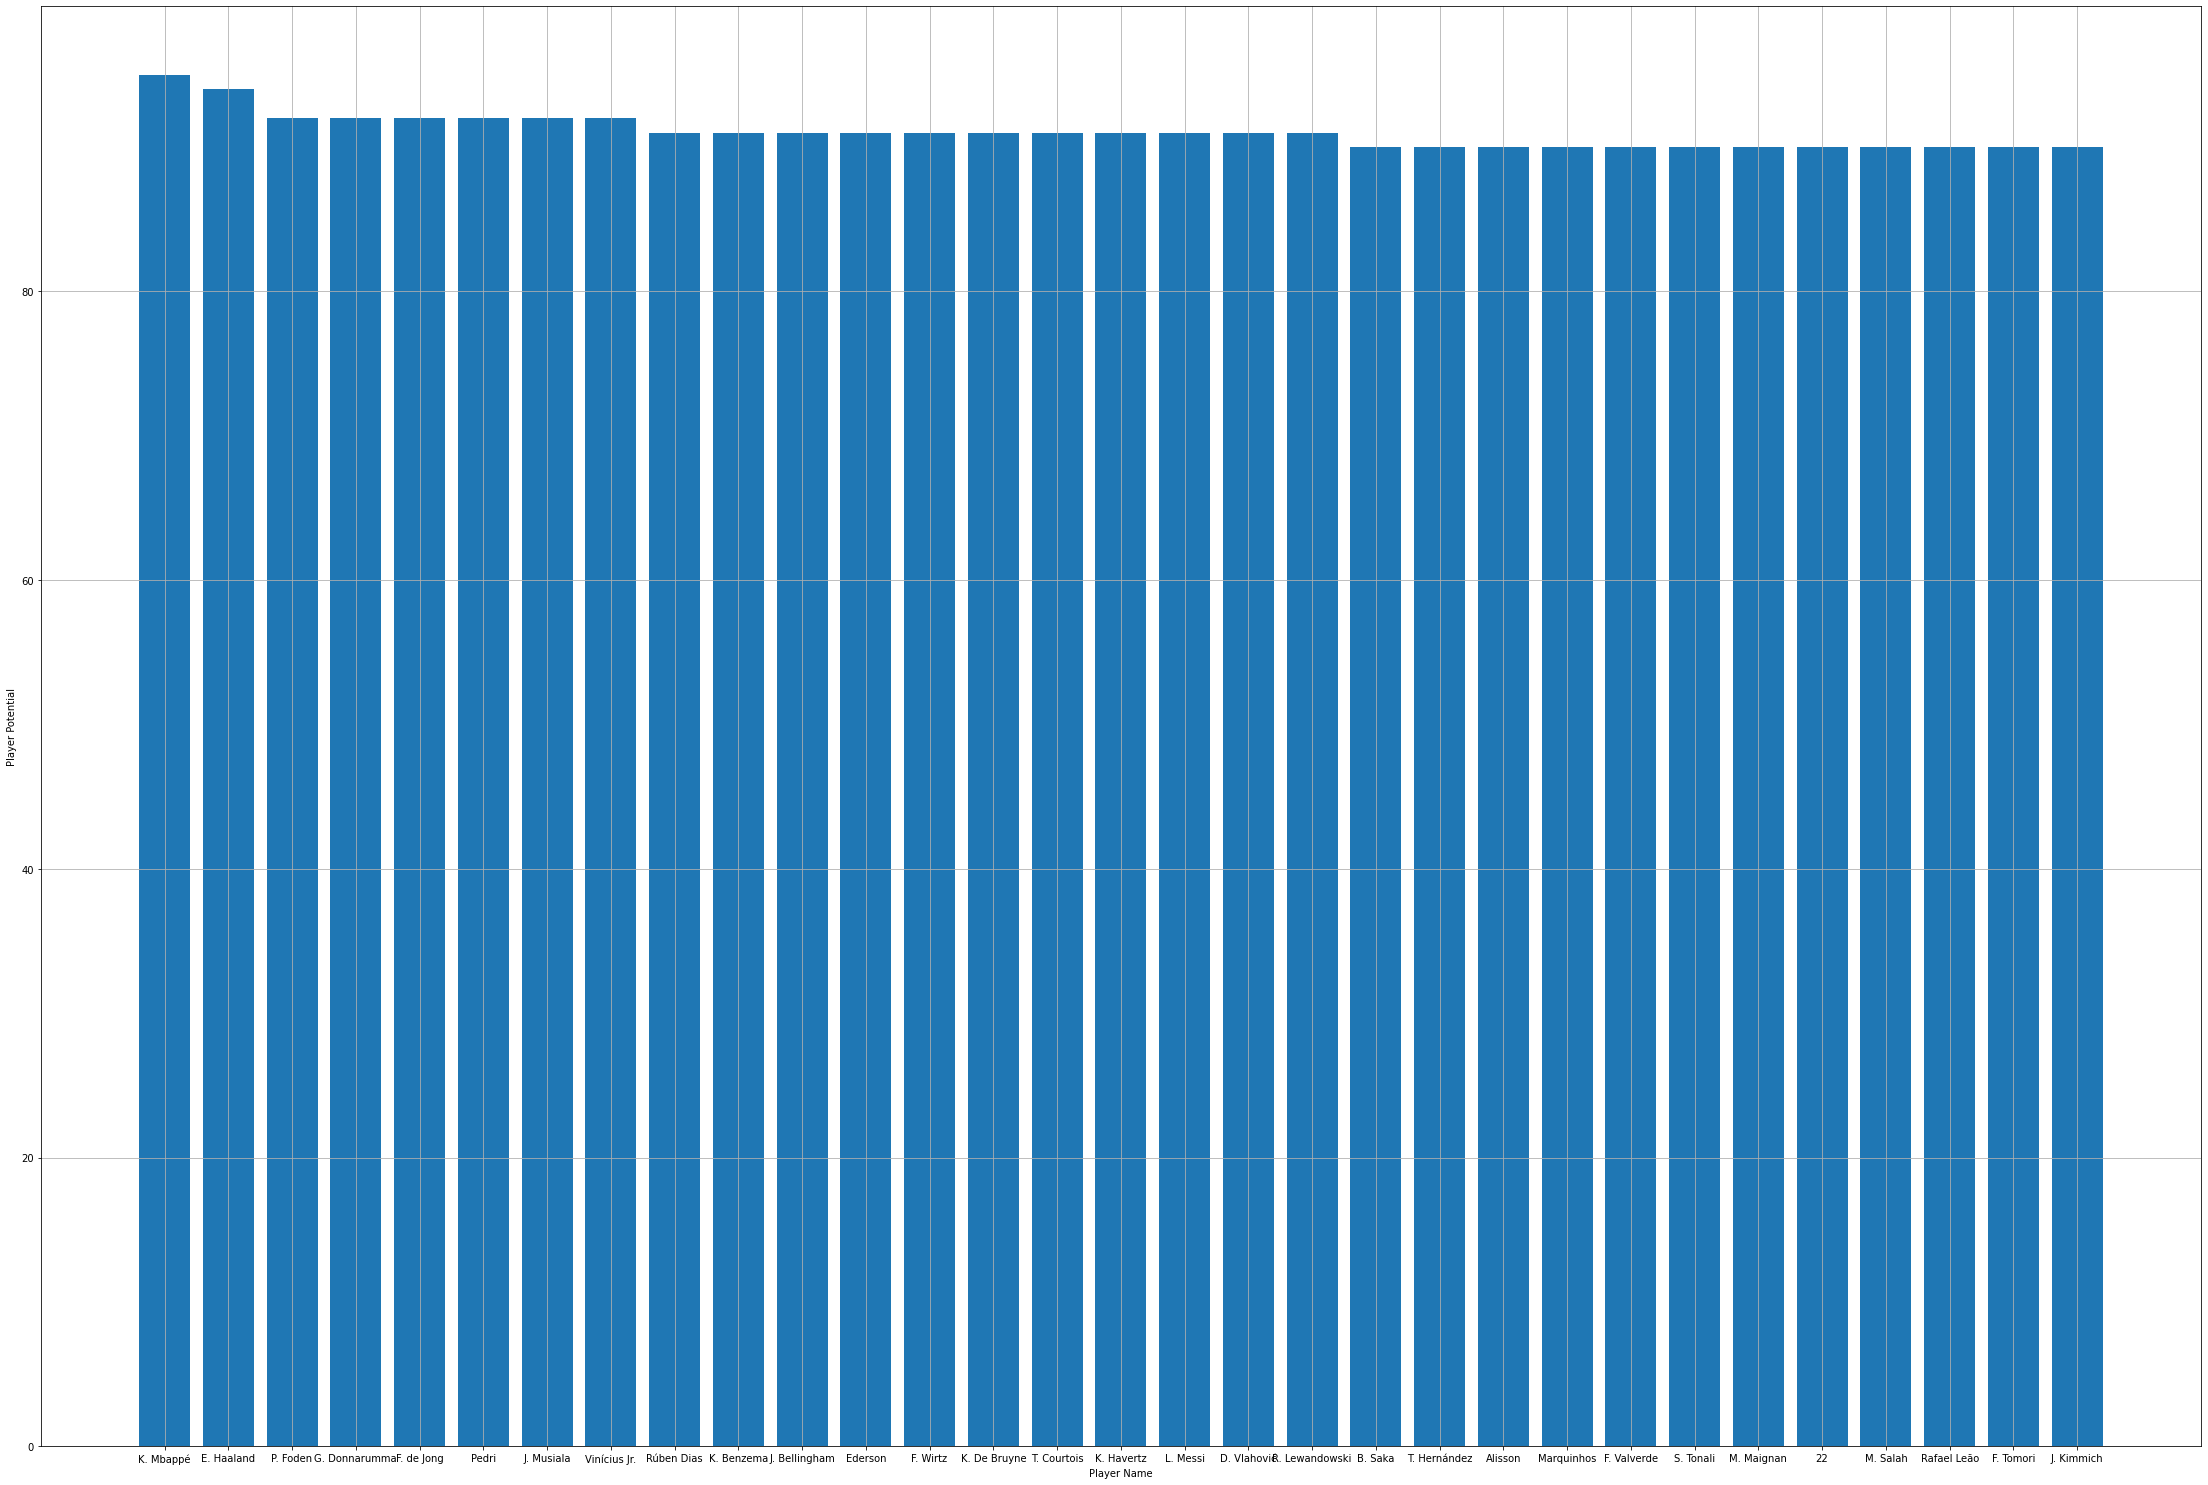

In [ ]:
new_df = fifa_final[fifa_final["POT"] >= 90].sort_values(by = "POT" ,ascending=False)
fig = plt.figure()
ax = fig.add_axes((1,1,5,5))
plt.xlabel("Player Name")
plt.ylabel("Player Potential")
plt.bar(new_df['Name'] , new_df['POT'])
plt.grid()


# Q 11 Find the Player(s) whose potential is more than 90 but the age < 20

In [ ]:
fifa_final[(fifa_final["POT"] > 90)  &  (fifa_final["Age"] < 20)][['Name','Age','POT']]

,Name,Age,POT
16,J. Musiala,19,92
87,Pedri,19,92
213,F. Wirtz,19,91
447,J. Bellingham,19,91


# Q 12 Find the Player(s) whose Values is more than 10 but the Wage < 50

In [ ]:
fifa_final[(fifa_final["Value"] > 10)  &  (fifa_final["Wage"] < 50)][['Name','Value','Wage']]

,Name,Value,Wage
2,K. Kvaratskhelia,39.5,46
7,Gavi,43.5,18
8,E. Fernández,42.5,13
9,G. Rutter,12.5,30
10,Balde,15.0,27
...,...,...,...
1101,Q. McNeill,220.0,1
1105,M. O'Neill,425.0,2
1114,R. Smajić,775.0,1
1115,N. Paz,675.0,1


# Q13 Plot the graph for players whose OVA & POT is >= 90 for X-axis = Player Name and Y-axis = Total_Stats

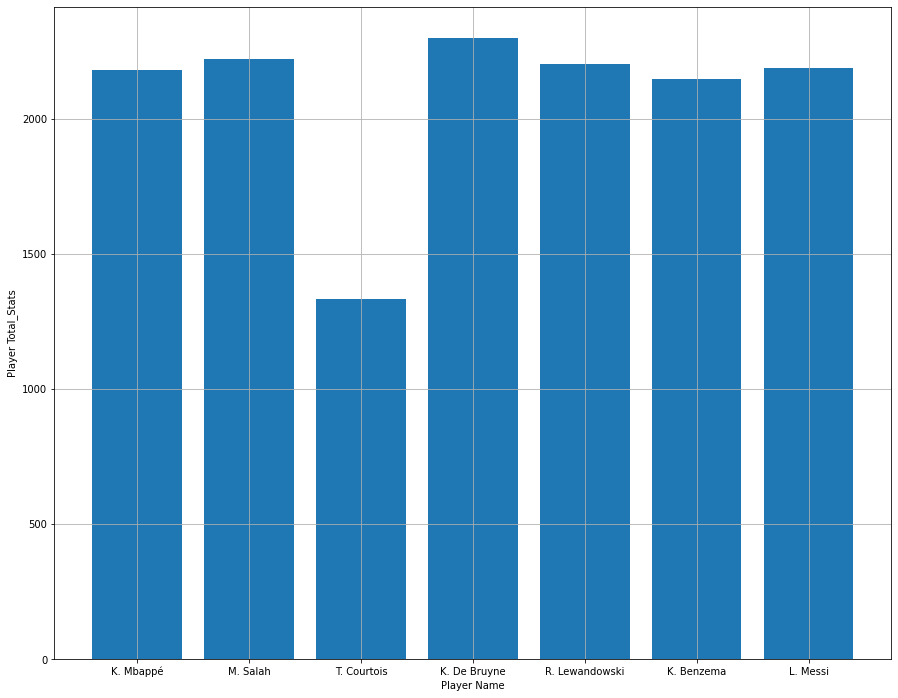

In [ ]:
new_fifa = fifa_final[(fifa_final["OVA"] >= 90)  &  (fifa_final["POT"] >= 90)].sort_values('Age')
fig = plt.figure(figsize = (15,12))
# ax = fig.add_axes((1,1,2,2))
plt.xlabel("Player Name")
plt.ylabel("Player Total_Stats")
plt.bar(new_fifa['Name'] , new_fifa['Total_stats'])
plt.grid()

# Q14 Find Co-Realtion For All Columns

In [ ]:
fifa_final.corr()

,Age,OVA,POT,Value,Wage,Total_stats
Age,1.000000,0.618049,-0.200452,-0.120577,-0.030792,0.345349
OVA,0.618049,1.000000,0.499725,-0.256377,-0.010050,0.591335
POT,-0.200452,0.499725,1.000000,-0.101609,0.123159,0.254368
Value,-0.120577,-0.256377,-0.101609,1.000000,0.259395,-0.165920
Wage,-0.030792,-0.010050,0.123159,0.259395,1.000000,-0.011427
Total_stats,0.345349,0.591335,0.254368,-0.165920,-0.011427,1.000000


# Q14 Plot Heatmap for Co-Realtion of all Columns

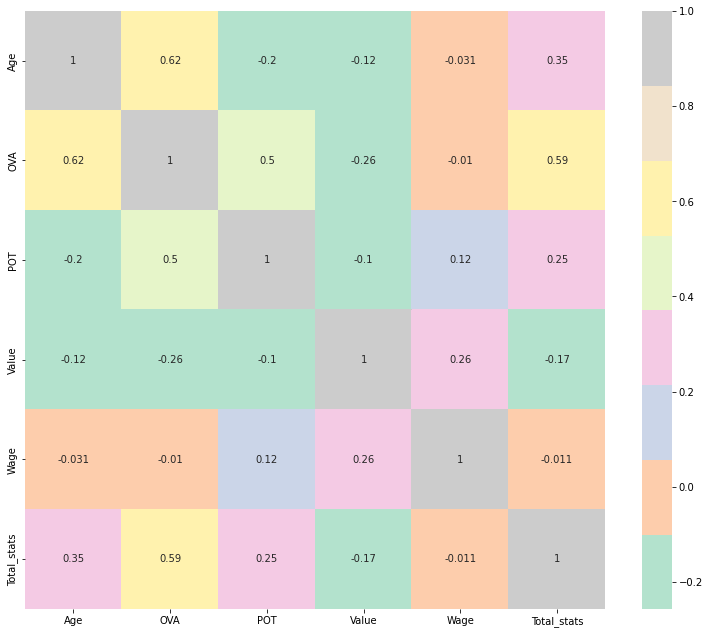

In [ ]:
plt.figure(figsize=(13,11))
sns.heatmap(fifa_final.corr(), annot=True , cmap='Pastel2')